## Plot weight matrix output from OPNMF 
Here we want to show the left and right weight matrices decomposition results with each component as a row and subject-metric pairs as columns.

For visualization purposes, we will divide the component metrics proportions by the average within rows to see within component variation in the microstructural metrics. (Note that we could also perform a z-score within rows but we chose to divide by the mean of the component to conserve the non-negative aspect of the NMF decomposition)

In [1]:
import numpy as np
from scipy import stats
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

pnmf_out_dir = "" #ENTER the directory that contains the OPNMF outputs

### Load the OPNMF results for the left and right striatum decomposition

In [71]:
left_pnmf_out = loadmat(pnmf_out_dir+'left_5comps.mat')
right_pnmf_out = loadmat(pnmf_out_dir+'right_5comps.mat')

### Plot the left weight matrix


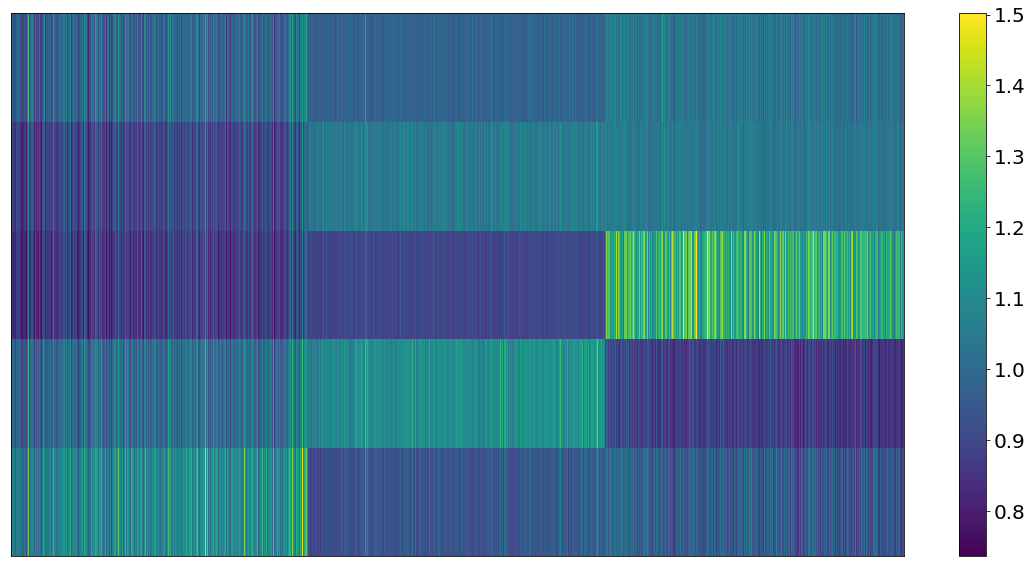

In [89]:
H_left = np.copy(left_pnmf_out['H'])
h_norm=np.zeros_like(H_left)
for r in range(0,np.shape(H_left)[0]):
    row_avg = np.mean(H_left[r,:])
    h_norm[r,:] = H_left[r,:]/row_avg
    
fig=plt.figure(figsize=(20,10))
plt.pcolormesh(h_norm, cmap='viridis')
plt.clim(np.min(h_norm),np.max(h_norm))
plt.yticks([])
plt.xticks([])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20) 
plt.savefig(pnmf_out_dir+'left_divided_row.png',transparent=True, edgecolor='none', dpi=300)

### Plot the right weight matrix
Note that in the right ONMF weight matrix the component along the lateral ventricle (light green, equivalent to the third left component) is labelled as the fourth component. 
Hence, to get visual correspondence between the left and right weight matrix, we need to swap the third and fourth row in the right matrix (first row at the bottom and fifth row at the top)

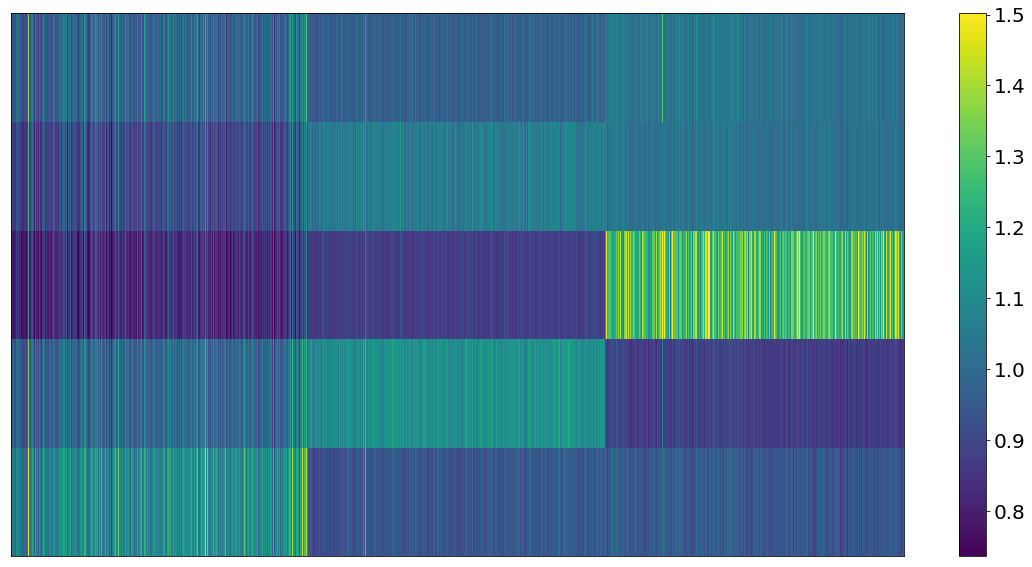

In [88]:
H_right = np.copy(right_pnmf_out['H'])
#change row order to get correspondence with the left weight amtrix
H_right_2 = np.copy(H_right)
H_right[2]=H_right_2[3]
H_right[3]=H_right_2[2]

h_norm_right=np.zeros_like(H_right)
for r in range(0,np.shape(H_right)[0]):
    row_avg = np.mean(H_right[r,:])
    h_norm_right[r,:] = H_right[r,:]/row_avg
    
fig=plt.figure(figsize=(20,10))
plt.pcolormesh(h_norm_right, cmap='viridis')
plt.clim(np.min(h_norm),np.max(h_norm)) # here we use the minimum and maximum value of the left weight matrix 
plt.yticks([])
plt.xticks([])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20) 
plt.savefig(pnmf_out_dir+'right_divided_row.png',transparent=True, edgecolor='none', dpi=300)